In [4]:
library("rcompanion")
library("car")
library("dplyr")
library("IDPmisc")

In [5]:
suicide <- read.csv("C:/Users/Marcy/Documents/Entity Coursework/DSO 105 Basic Stats in Python/lesson 6/suicide.csv")

In [3]:
head(suicide)

,ï..country,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


# determine whether suicide rates (suicides/100k pop) has changed over the years (year), and see if the generation has any influence. 

#### check assumptions

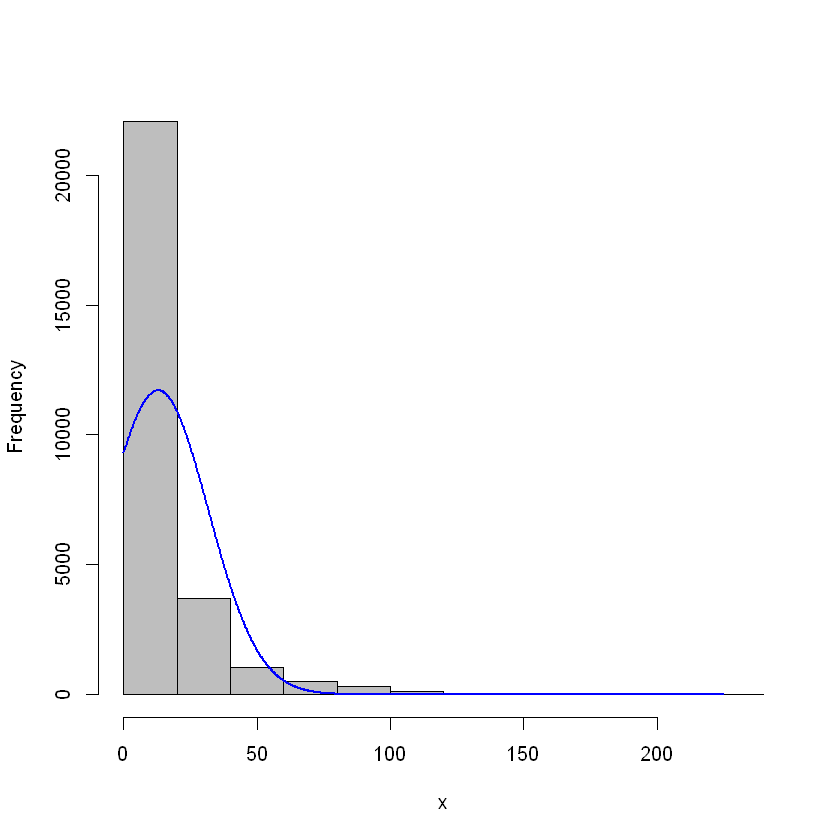

In [6]:
plotNormalHistogram(suicide$suicides.100k.pop)

In [7]:
suicide$suicides.100k.popSQRT <- sqrt(suicide$suicides.100k.pop)

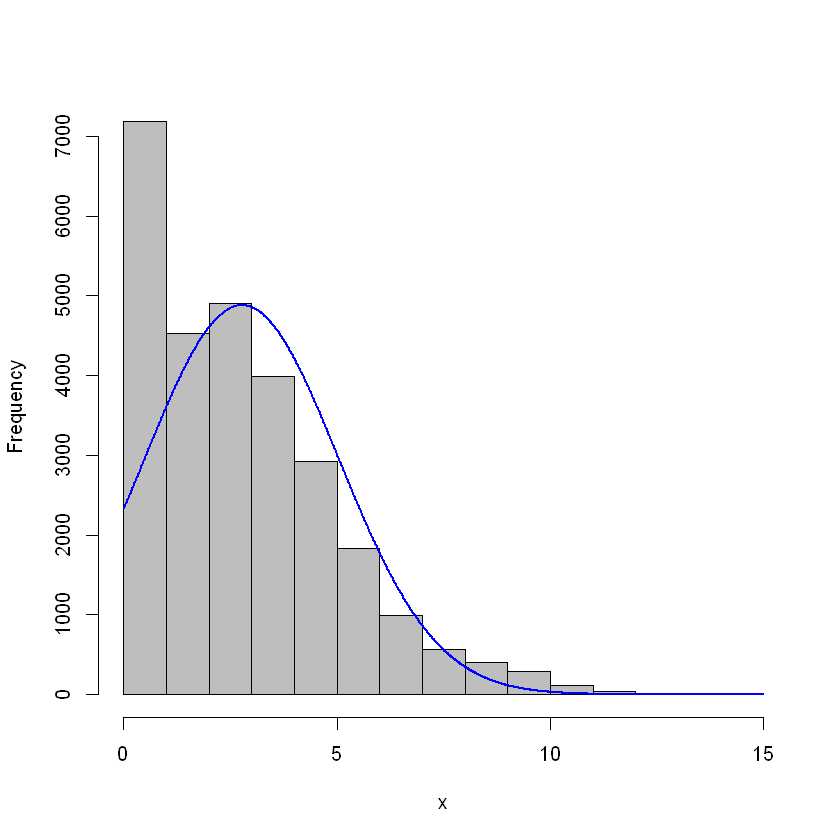

In [8]:
plotNormalHistogram(suicide$suicides.100k.popSQRT)

#### not that great, try LOG

In [9]:
suicide$suicides.100k.popLOG <- log(suicide$suicides.100k.pop)

In [11]:
plotNormalHistogram(suicide$suicides.100k.popLOG)

ERROR: Error in seq.default(min(x), max(x), length = length): 'from' must be a finite number


#### too far with LOG, omit the null values

In [12]:
suicide4 <- NaRV.omit(suicide)

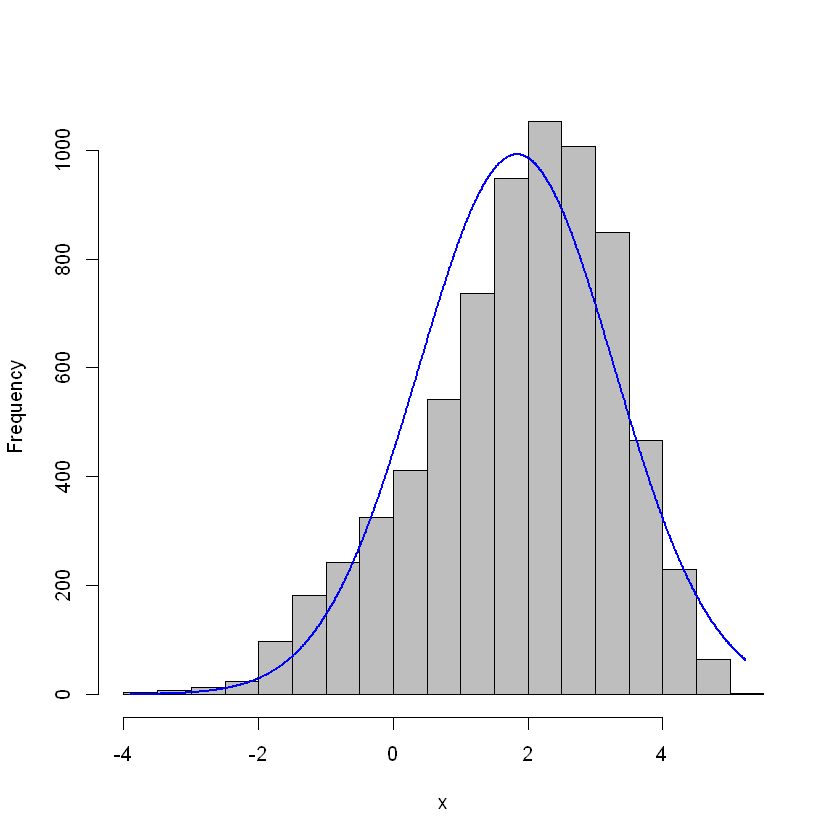

In [13]:
plotNormalHistogram(suicide4$suicides.100k.popLOG)

#### nice.

#### next, test for homogeneity of variance

In [14]:
leveneTest(suicides.100k.popLOG ~ generation, data=suicide4)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,18.17709,5.712815e-18
,7201,NA,NA


#### P,.05 but we'll go ahead.  sample size is 27,820 entries, which is >40

In [15]:
RManova1 <- aov(suicides.100k.popLOG~(generation*year)+Error(ï..country/(year)), suicide4)
summary(RManova1)

Warning message in aov(suicides.100k.popLOG ~ (generation * year) + Error(ï..country/(year)), :
"Error() model is singular"



Error: ï..country
                Df Sum Sq Mean Sq F value Pr(>F)  
generation       5  377.6   75.53   2.098 0.0746 .
year             1    4.3    4.25   0.118 0.7320  
generation:year  5   84.6   16.92   0.470 0.7975  
Residuals       77 2771.7   36.00                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: ï..country:year
                Df Sum Sq Mean Sq F value   Pr(>F)    
generation       5  35.50   7.101   4.638 0.000942 ***
year             1   0.73   0.729   0.476 0.492386    
generation:year  5  33.33   6.666   4.354 0.001528 ** 
Residuals       77 117.89   1.531                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Error: Within
                  Df Sum Sq Mean Sq F value Pr(>F)    
generation         5   4723   944.5    1087 <2e-16 ***
generation:year    5    886   177.2     204 <2e-16 ***
Residuals       7020   6099     0.9                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0

#### it does look like year affects suicides, now to see how in the post hocs

In [16]:
pairwise.t.test(suicide4$suicides.100k.popLOG, suicide4$generation, p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  suicide4$suicides.100k.popLOG and suicide4$generation 

                Boomers G.I. Generation Generation X Generation Z Millenials
G.I. Generation 6.5e-16 -               -            -            -         
Generation X    1.2e-13 < 2e-16         -            -            -         
Generation Z    < 2e-16 < 2e-16         < 2e-16      -            -         
Millenials      < 2e-16 < 2e-16         < 2e-16      < 2e-16      -         
Silent          1.2e-05 2.0e-05         < 2e-16      < 2e-16      < 2e-16   

P value adjustment method: bonferroni 

#### there's a difference in suicide rates in all the generations.

#### now to see how there's a difference by comparing means

In [19]:
suicideMeans <- suicide4 %>% group_by(generation, year) %>% summarize(Mean=mean(suicides.100k.pop))

`summarise()` has grouped output by 'generation'. You can override using the `.groups` argument.



#### with the averages, Gen Z is least likely to commit suicide. 